In [30]:
import matplotlib.pyplot as plt
import numpy as np
from copy import copy

# Testing the projections

In [55]:
def project_onto_circle(x, y):
    if x**2 + y**2 <= 1.5:
        new_x = x
        new_y = y
    else:
        D = np.sqrt(x**2 + y**2)
        new_x = (x * np.sqrt(1.5)) /  D
        new_y = (y * np.sqrt(1.5)) /  D
    return np.array([new_x, new_y])

def project_onto_square(x, y):
    if abs(x) < 1 and abs(y) < 1:
        new_x, new_y = x, y
    elif abs(x) > 1:
        if abs(y) > 1:
            new_x, new_y =  x/abs(x), y/abs(y)
        else:
            new_x, new_y = x/abs(x), y
    else:
        new_x, new_y = x, y/abs(y)
    return np.array([new_x, new_y])

def project_onto_triangle(x, y):
    if x >= -1 and x <= 1.5 and y < -1:
        new_x, new_y = x, -1
    elif y >= -1 and y <= 1.5 and x < -1:
        new_x, new_y = -1, y
    elif  x < -1 and y < -1:
        new_x, new_y = -1, -1
    elif x > 1.5 and y < x - 2.5:
        new_x, new_y = 1.5, -1
    elif x < y - 2.5 and y > 1.5:
        new_x, new_y = -1, 1.5
    elif x >= -1 and x <= -y + 0.5 and y >= -1 and y <= -x + 0.5:
        new_x, new_y = x, y
    else:
        new_x, new_y = (x - y + 0.5) / 2, -((x - y + 0.5) / 2) + 0.5
    return np.array([new_x, new_y])

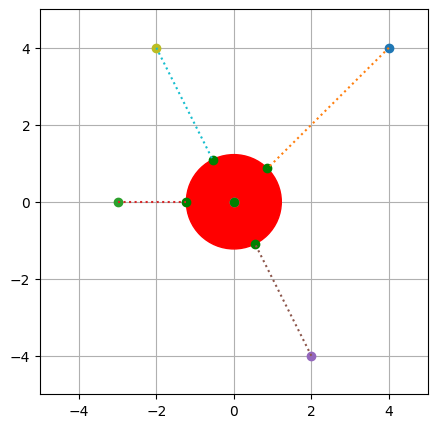

In [7]:
circle1 = plt.Circle((0, 0), np.sqrt(1.5), color='r')

fig, ax = plt.subplots()
ax.set_ylim(-5,5)
ax.set_xlim(-5,5)
fig.set_figwidth(5)
fig.set_figheight(5)
points = [(4,4), (-3,0), (2,-4), (0,0), (-2,4)]
for point in points:
    projected_point = project_onto_circle(*point)
    ax.plot(*point, "o")
    ax.plot(* projected_point, "go")
    ax.plot(*zip(point, projected_point), linestyle="dotted")
ax.grid(True)
ax.set_axisbelow(True)
ax.add_patch(circle1)


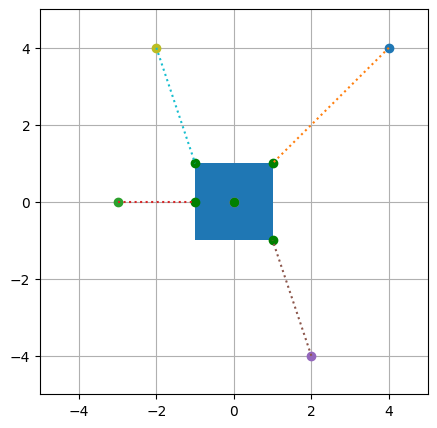

In [8]:
square = plt.Rectangle((-1,-1), 2, 2)
fig, ax = plt.subplots()
ax.set_ylim(-5,5)
ax.set_xlim(-5,5)
fig.set_figwidth(5)
fig.set_figheight(5)
points = [(4,4), (-3,0), (2,-4), (0,0), (-2,4)]
for point in points:
    projected_point = project_onto_square(*point)
    ax.plot(*point, "o")
    ax.plot(* projected_point, "go")
    ax.plot(*zip(point, projected_point), linestyle="dotted")
ax.grid(True)
ax.set_axisbelow(True)
ax.add_patch(square)

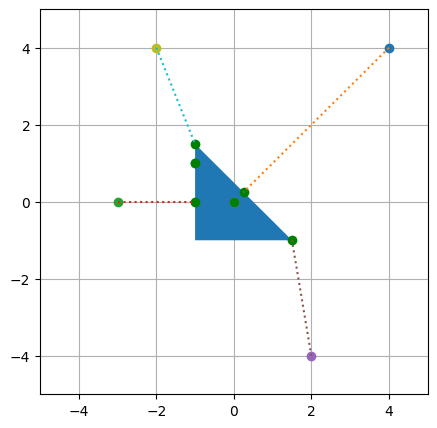

In [9]:
square = plt.Polygon([(-1,-1), (1.5,-1), (-1, 1.5)])
fig, ax = plt.subplots()
ax.set_ylim(-5,5)
ax.set_xlim(-5,5)
fig.set_figwidth(5)
fig.set_figheight(5)
points = [(4,4), (-3,0), (2,-4), (0,0), (-2,4), (-1,1)]
for point in points:
    projected_point = project_onto_triangle(*point)
    ax.plot(*point, "o")
    ax.plot(* projected_point, "go")
    ax.plot(*zip(point, projected_point), linestyle="dotted")
ax.grid(True)
ax.set_axisbelow(True)
ax.add_patch(square)

In [56]:
def gradient_descent(point, gamma, gradient, n_iter=1):
    p = point
    points = []
    for _ in range(n_iter):
        p = p -gamma * gradient(*p)
        points.append(p)
    return p, points

Testing the algorithm on the already computed examples

In [28]:
def grad(x, y):
    return np.array([2*x, 4*y])
def fun(x, y):
    return x**2 + 2*y**2
starting_point = [1, 1]
print(gradient_descent(starting_point, 5/18, grad, 5)) #CORRECT RESULT
print(gradient_descent(starting_point, 3/10, grad)) #CORRECT RESULT
print(fun(*gradient_descent(starting_point, 5/18, grad)[0])) #CORRECT RESULT

(array([ 1.73415299e-02, -1.69350878e-05]), [array([ 0.44444444, -0.11111111]), array([0.19753086, 0.01234568]), array([ 0.0877915 , -0.00137174]), array([0.03901844, 0.00015242]), array([ 1.73415299e-02, -1.69350878e-05])])
(array([ 0.4, -0.2]), [array([ 0.4, -0.2])])
0.22222222222222224


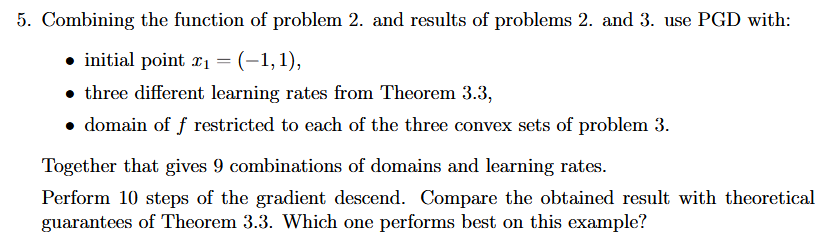

By plotting the derivatives in desmos we can get the following:\
x* = (-0.4325, -0.21625)

# GENERAL SETUP

In [72]:
def projected_gradient_descent(point, gamma, gradient, projection, n_iter=1):
    p = projection(*point)
    points = []
    points.append(p)
    for _ in range(n_iter):
        p = np.array(projection(*(p - gamma * gradient(*p)))) 
        points.append(p)
    return p, points

In [154]:
def projected_gradient_descent_adaptive_gamma(point, alpha, gradient, projection, n_iter=1):
    p = projection(*point)
    points = []
    points.append(p)
    for i in range(n_iter):
        gamma = 2/(alpha*(i+2))
        p = projection(*(p -gamma * gradient(*p)))
        points.append(p)
    return p, points

In [29]:
def func(x, y):
    return x**2 + np.e**x + y**2 -x*y

def grad_func(x, y):
    return np.array([2*x + np.e**x - y, 2*y -x])

og_point = np.array([-0.4325, -0.21625])

In [70]:
shape_pairs = [(project_onto_circle, plt.Circle((0, 0), np.sqrt(1.5), color='r', ec="black", fc="none", ls="--")),
               (project_onto_square, plt.Rectangle((-1,-1), 2, 2, color='r', ec="black", fc="none", ls="--")),
               (project_onto_triangle, plt.Polygon([(-1,-1), (1.5,-1), (-1, 1.5)], color='r', ec="black", fc="none", ls="--"))]

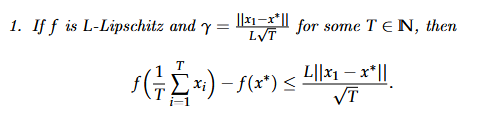

[-0.38373613  0.16677564] 0.920376553240686
[-0.40430284  0.19975838] 0.9515690403357353
[-0.40430284  0.19975838] 0.9515690403357353


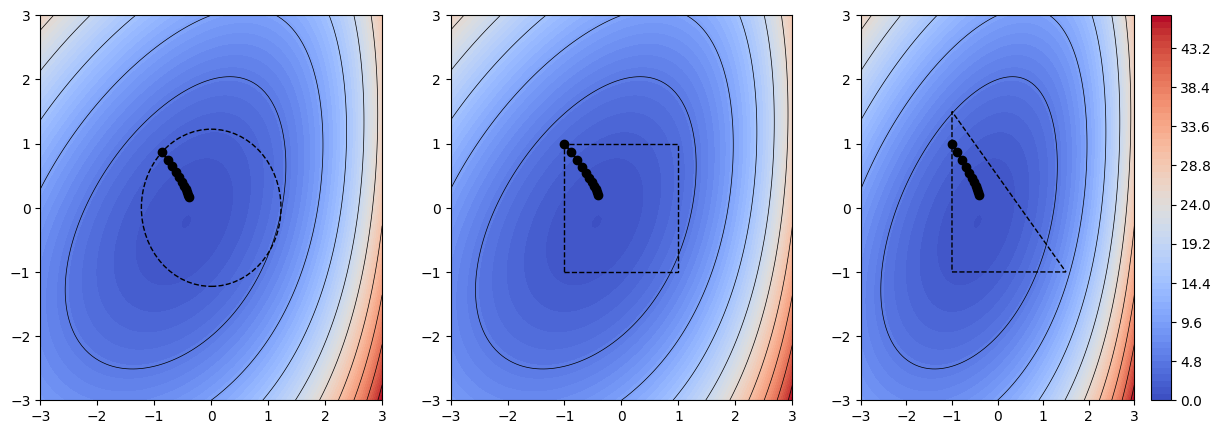

In [165]:
#SETTING PROPER FUNCTION PARAMETERS
T = 4
L = 14.672
gamma = np.linalg.norm(np.array([-1, 1]) - og_point) / (np.sqrt(T) * L)

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

fig, ax = plt.subplots(1, 3, figsize=(15,5))
contour = plt.contourf(X, Y, Z, levels=60, cmap="coolwarm")
fig.colorbar(contour)
returned_points_1 = []
for i, sp in enumerate(shape_pairs):
    ax[i].contourf(X, Y, Z, levels=60, cmap="coolwarm")

    #GRADIENT DESCENT
    finish1, points1 = projected_gradient_descent(np.array([-1, 1]), gamma, grad_func, sp[0], 10) #numbering again coincides with statement number in theorem 3.3
    returned_points_1.append(points1)
    print(finish1, func(*finish1))

    #PLOTTING
    ax[i].contour(X, Y, Z, levels=10, colors="black", linewidths=0.5)
    ax[i].add_patch(copy(sp[1]))
    ax[i].set_xlim(-3,3)
    for point in points1:
        ax[i].plot(*point, "o", c="black")
    ax[i].plot(*zip(*points1), "-", c="black", markersize=4, label="Projected Descent Path")


Calculating the bounds

In [84]:
def upper_bound_1(starting_point, og_point, L, T):
    return L*(np.linalg.norm(starting_point - og_point))/np.sqrt(T)

In [169]:
cum_sum = 0
for i in range(T):
    cum_sum += returned_points_1[0][i]/T
    
print(func(*cum_sum) - func(*og_point), upper_bound_1(returned_points_1[0][0], og_point, L, T))

1.2366860798816246 8.552858401410788


Since we can obtain 1 comparison for each T value we will need to run GD a couple of times with a couple different Ts to get a good visualisation of the bound.

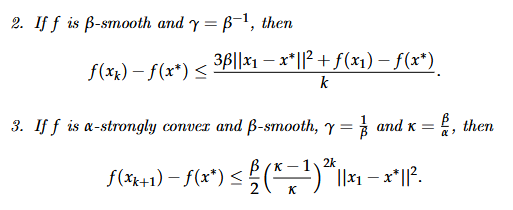

[-0.35737149 -0.09058593] 0.8030599507629322
[-0.3556857  -0.08413374] 0.8043584491860291
[-0.3556857  -0.08413374] 0.8043584491860291


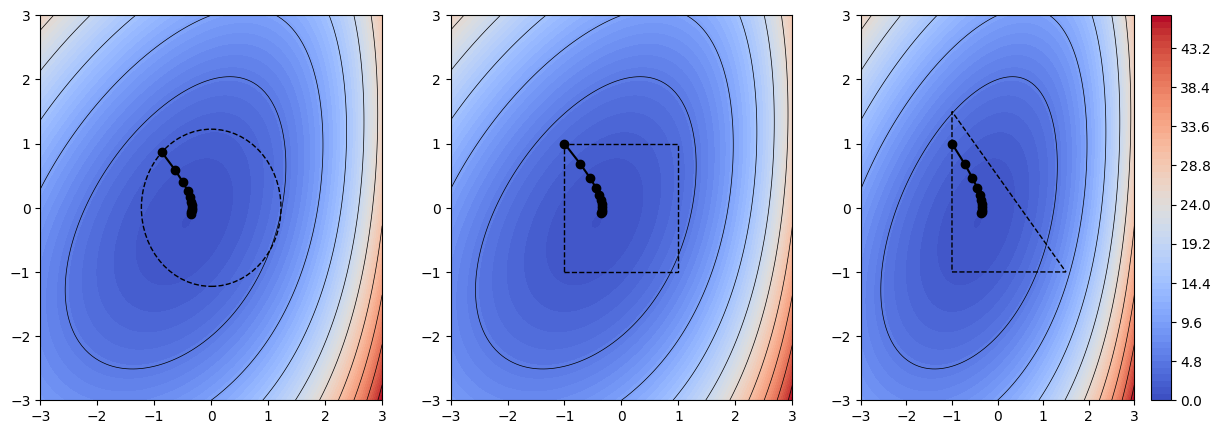

In [136]:
#SETTING PROPER FUNCTION PARAMETERS
beta = 9.522

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

fig, ax = plt.subplots(1, 3, figsize=(15,5))
contour = plt.contourf(X, Y, Z, levels=60, cmap="coolwarm")
fig.colorbar(contour)
returned_points_2 = []
for i, sp in enumerate(shape_pairs):
    ax[i].contourf(X, Y, Z, levels=60, cmap="coolwarm")
    
    #GRADIENT DESCENT
    finish2, points2 = projected_gradient_descent(np.array([-1, 1]), 1/beta, grad_func, sp[0], 10)
    returned_points_2.append(points2)
    print(finish2, func(*finish2))
    
    ax[i].contour(X, Y, Z, levels=10, colors="black", linewidths=0.5)
    ax[i].add_patch(copy(sp[1]))
    ax[i].set_xlim(-3,3)
    for point in points2:
        ax[i].plot(*point, "o", c="black")
    ax[i].plot(*zip(*points2), "-", c="black", markersize=4, label="Projected Descent Path")


In [92]:
#Number corresponds to the statement number in theorem 3.3
def upper_bound_2(points, og_point, beta, fn):
    bounds = []
    start = points[0]
    squared_norm = np.square(np.linalg.norm(start - og_point))
    for i in range(len(points)):
        cur = points[i]
        bounds.append((3*beta*squared_norm + fn(*cur) - fn(*og_point))/(i+1))
    return bounds

In [119]:
ps = returned_points_2[0]
def plot_upper_bounds_2(points, og_point, func, ax):
    print(points)
    diffs = []
    for i, p in enumerate(points):
        diffs.append(func(*p) - func(*og_point))
    ax.plot(range(1, len(diffs)+1), diffs)
    bounds = upper_bound_2(ps, og_point, beta, func)
    ax.plot(range(1, len(diffs)+1), bounds)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel("K")
    ax.set_ylabel("y")

[array([-0.8660254,  0.8660254]), array([-0.63734906,  0.59317556]), array([-0.49670827,  0.40165065]), array([-0.41410622,  0.26512371]), array([-0.36869503,  0.16594773]), array([-0.34646215,  0.09237175]), array([-0.33825899,  0.03658456]), array([-0.33824933, -0.0066236 ]), array([-0.34278015, -0.04075531]), array([-0.34960532, -0.06819382]), array([-0.35737149, -0.09058593])]
[array([-1.,  1.]), array([-0.72357482,  0.68494014]), array([-0.55059914,  0.46508558]), array([-0.44666303,  0.30957515]), array([-0.38752191,  0.19764349]), array([-0.35665124,  0.11543293]), array([-0.34313319,  0.05373191]), array([-0.33993485,  0.00641024]), array([-0.34261672, -0.03063611]), array([-0.34842568, -0.0601829 ]), array([-0.3556857 , -0.08413374])]
[array([-1,  1]), array([-0.72357482,  0.68494014]), array([-0.55059914,  0.46508558]), array([-0.44666303,  0.30957515]), array([-0.38752191,  0.19764349]), array([-0.35665124,  0.11543293]), array([-0.34313319,  0.05373191]), array([-0.33993485

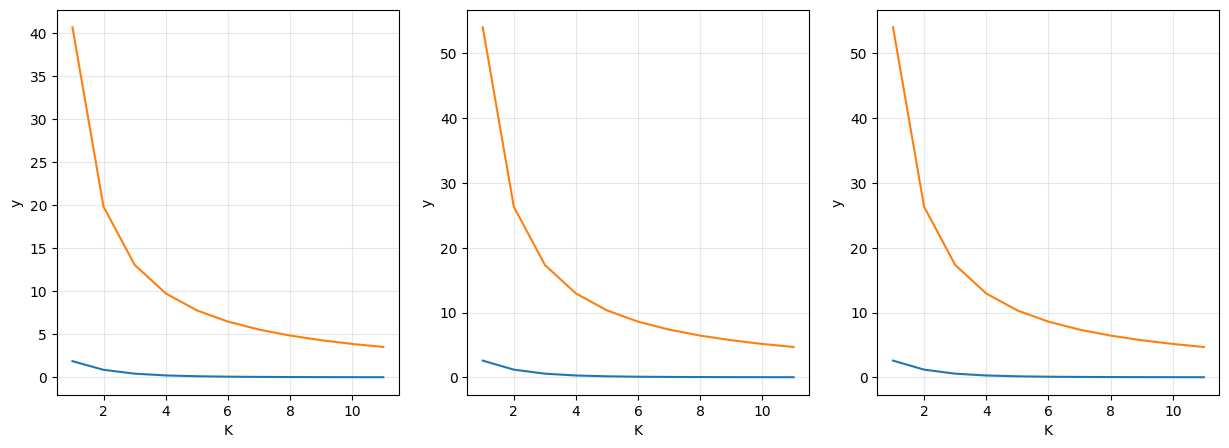

In [120]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

for i in range(3):
    ps = returned_points_2[i]
    plot_upper_bounds_2(ps, og_point, func, axes[i])

In [121]:
def upper_bounds_3(points, og_point, beta, alpha):
    initial_point = points[0]
    kappa = beta / alpha
    squared_norm = np.square(np.linalg.norm(initial_point - og_point))
    coefficient = (kappa - 1) / kappa
    bounds = []
    for i in range(len(points)-1):
        bounds.append((beta / 2) * coefficient**(2 * (i + 1)) * squared_norm)
    return bounds

In [130]:
ps = returned_points_2[0]
alpha = 1.065
def plot_upper_bounds_3(points, og_point, beta, alpha, func, ax):
    bounds3 = upper_bounds_3(points, og_point, beta, alpha)
    diffs = []
    for i, p in enumerate(ps):
        diffs.append(func(*p) - func(*og_point))
    ax.plot(range(1, len(bounds3) + 1), diffs[1:]) #there is no bound for the first diff since indexing is k+1 in the theorem
    ax.plot(range(1, len(bounds3) + 1), bounds3)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel("K")
    ax.set_ylabel("y")

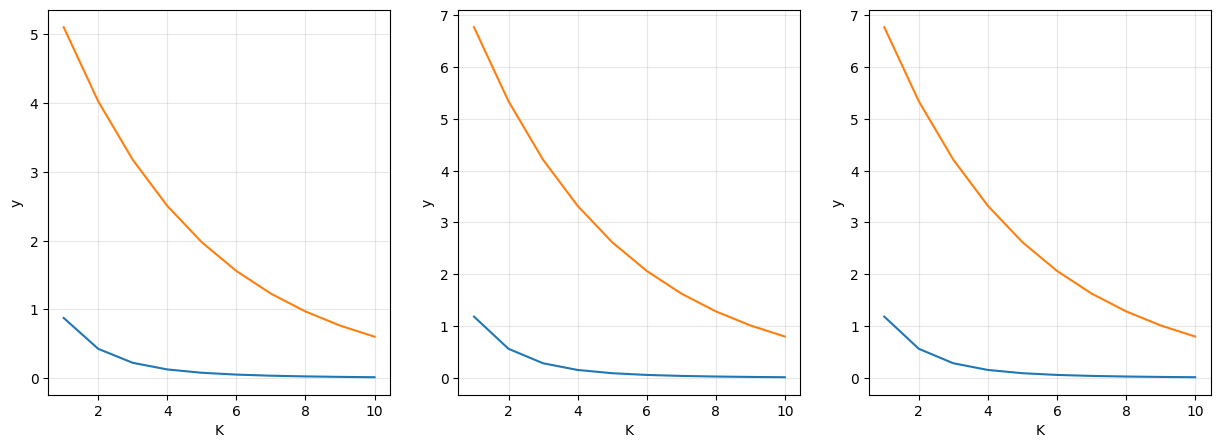

In [131]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

for i in range(3):
    ps = returned_points_2[i]
    plot_upper_bounds_3(ps, og_point, beta, alpha, func, axes[i])

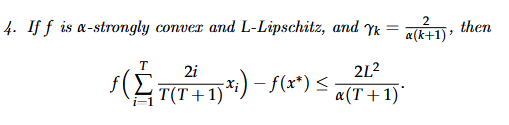

[-0.43408651 -0.21838784] 0.7891813385423434
[-0.42768474 -0.20957685] 0.7892208094896807
[-0.4255567  -0.20664283] 0.7892674560462846


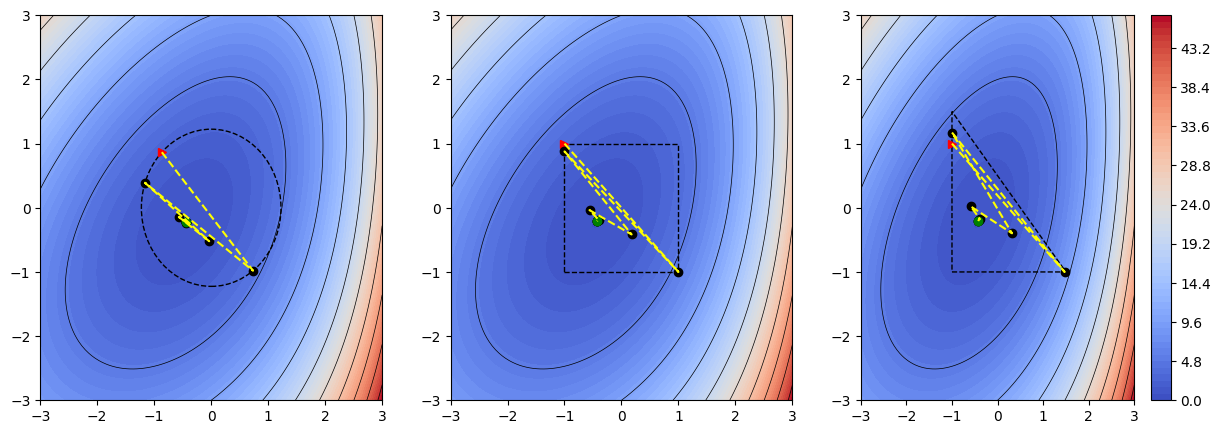

In [156]:
#SETTING PROPER FUNCTION PARAMETERS
alpha = 1.065

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

fig, ax = plt.subplots(1, 3, figsize=(15,5))
contour = plt.contourf(X, Y, Z, levels=60, cmap="coolwarm")
returned_points_4 = []
fig.colorbar(contour)
for i, sp in enumerate(shape_pairs):
    ax[i].contourf(X, Y, Z, levels=60, cmap="coolwarm")

    #GRADIENT DESCENT
    finish4, points4 = projected_gradient_descent_adaptive_gamma(np.array([-1, 1]), alpha, grad_func, sp[0], 10)
    print(finish4, func(*finish4))
    returned_points_4.append(points4)


    ax[i].contour(X, Y, Z, levels=10, colors="black", linewidths=0.5)
    ax[i].add_patch(copy(sp[1])) #it is weird to me that this is even necessary
    ax[i].set_xlim(-3,3)
    ax[i].plot(*points4[0], ">r")
    for point in points4[1:len(points4)-1]:
        ax[i].plot(*point, "o", c="black")
    ax[i].plot(*points4[-1], "og")
    ax[i].plot(*zip(*points4), "--", c="yellow", markersize=4, label="Projected Descent Path")

In [168]:
def upper_bound_4(alpha, L , T):
    return (2 * L**2) / (alpha * (T + 1))

In [167]:
ps = returned_points_4[0]
cum_sum2 = 0
for i in range(T):
    cum_sum2 += (2 * (i+1) * ps[i]) / (T * (T + 1))

print(func(*cum_sum2) - func(*og_point), upper_bound_4(alpha, L , T))

0.02107232970419859 80.85167474178405
